In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import time
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

warnings.filterwarnings("ignore")

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


# Read Data in and do head

In [2]:
np.random.seed(42)
dataset = pd.read_csv("../input/flight-price-prediction/Clean_Dataset.csv", index_col=0)

dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Value Counts for much of the columns.

In [3]:
cols = ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]

for col in cols:
    print("Column Value Counts: ", col)
    print(dataset[col].value_counts())
    print()

Column Value Counts:  airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

Column Value Counts:  source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

Column Value Counts:  departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

Column Value Counts:  stops
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

Column Value Counts:  arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

Column Value Counts:  destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolka

# Drop flight column

In [4]:
dataset.drop("flight", axis=1, inplace=True)

# Change stops to numerical data

In [5]:
def change_stops(data_record):
    if data_record == "zero":
        return 0
    elif data_record == "one":
        return 1
    else:
        return 2

In [6]:
dataset["stops"] = dataset["stops"].apply(change_stops)

In [7]:
dataset["stops"].value_counts()

1    250863
0     36004
2     13286
Name: stops, dtype: int64

# Plot by airline

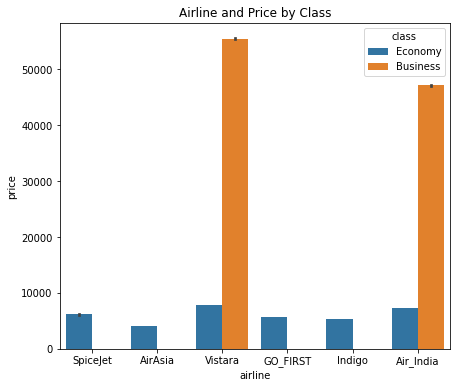

In [8]:
plt.figure(figsize=[7, 6])
sns.barplot(data=dataset, x="airline", y="price", hue="class")
plt.title("Airline and Price by Class")
plt.show()

# Business is much more expensive than economy and there are only 2 airlines that offer business.

# Get a distribution of the price

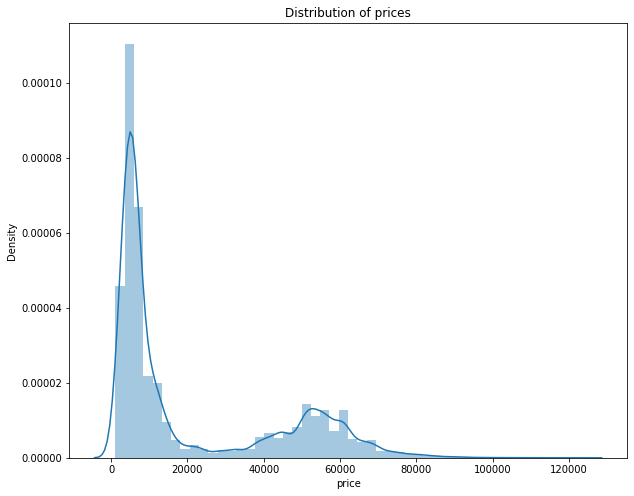

In [9]:
plt.figure(figsize=[10, 8])
sns.distplot(dataset["price"])
plt.title("Distribution of prices")
plt.show()

# Correlation heatmap for those features that are numeric

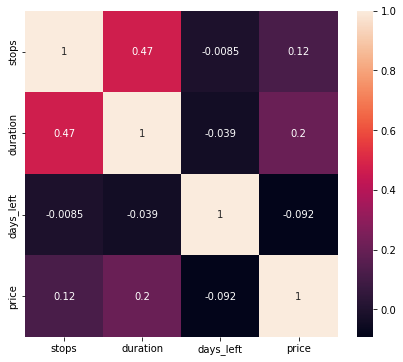

In [10]:
plt.figure(figsize=[7, 6])
sns.heatmap(dataset.corr(), annot=True)
plt.show()

# Show correlation between days left and pricing

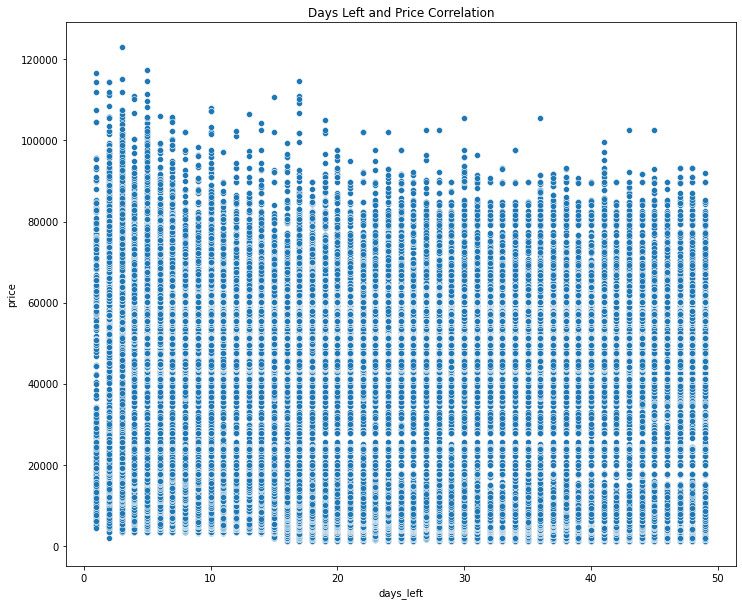

In [11]:
plt.figure(figsize=[12, 10])
sns.scatterplot(x=dataset["days_left"], y=dataset["price"])
plt.title("Days Left and Price Correlation")
plt.show()

# There is no correlation between the days left and price. The heatmap and scatter plot confirm this. days left will be dropped as a feature.

In [12]:
dataset.drop("days_left", axis=1, inplace=True)

# Find correlation between duration and price with class hue

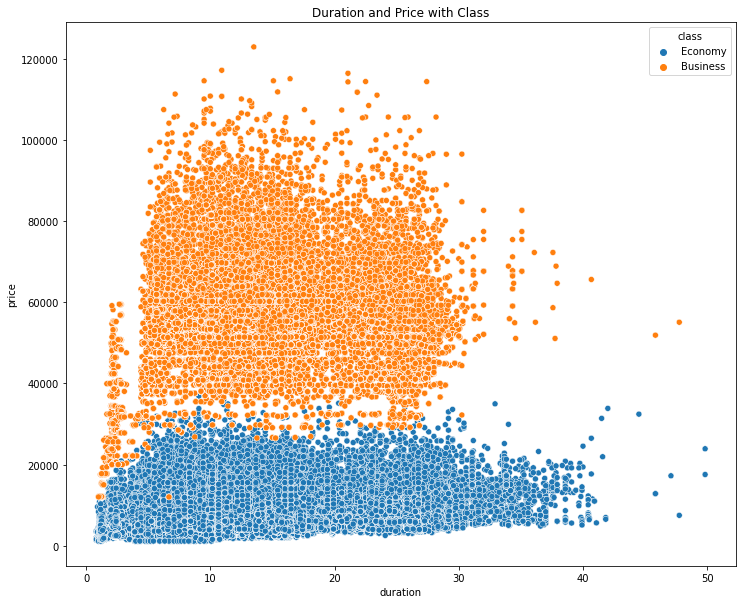

In [13]:
plt.figure(figsize=[12, 10])
sns.scatterplot(x=dataset["duration"], y=dataset["price"], hue=dataset["class"])
plt.title("Duration and Price with Class")
plt.show()

# Strong correlation with the class variable. Not as strong correlation with duration but heatmap shows slight positive correlation.

# Let's see prices per city.

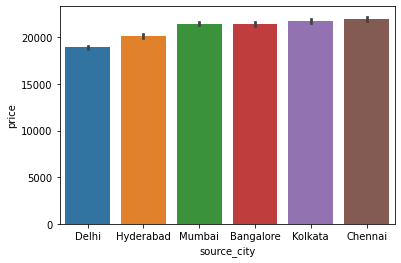

In [14]:
sns.barplot(data=dataset, x="source_city", y="price", order=["Delhi", "Hyderabad", "Mumbai", "Bangalore", "Kolkata", "Chennai"])
plt.show()

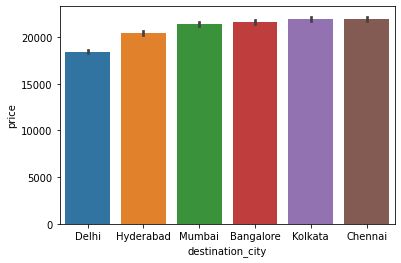

In [15]:
sns.barplot(data=dataset, x="destination_city", y="price", order=["Delhi", "Hyderabad", "Mumbai", "Bangalore", "Kolkata", "Chennai"])
plt.show()

# The prices for source city and destination city were pretty identical.

# Stops along with prices graph

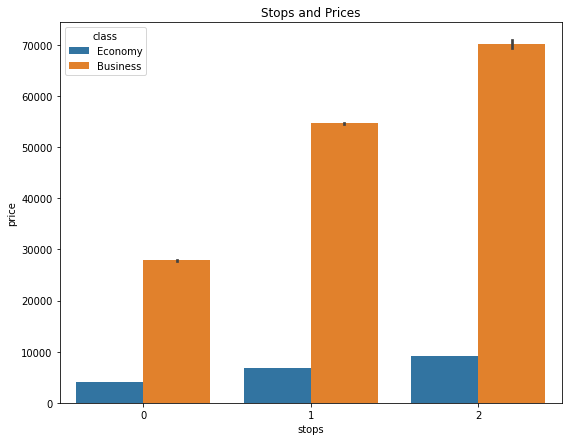

In [16]:
plt.figure(figsize=[9, 7])
sns.barplot(data=dataset, x="stops", y="price", hue="class")
plt.title("Stops and Prices")
plt.show()

# There is an increase in price when there are more stops, and price is very high with 2 or more stops and business class.

In [17]:
dataset[dataset["class"] == "Business"]["arrival_time"].value_counts()

Night            29025
Evening          26399
Morning          21786
Afternoon        10930
Early_Morning     3514
Late_Night        1833
Name: arrival_time, dtype: int64

In [18]:
dataset[dataset["class"] == "Economy"]["departure_time"].value_counts()

Morning          48821
Early_Morning    46688
Evening          44207
Afternoon        35245
Night            30537
Late_Night        1168
Name: departure_time, dtype: int64

# The two classes have similar distributions for departure and arrival time value counts. Late night times are not as common for both.

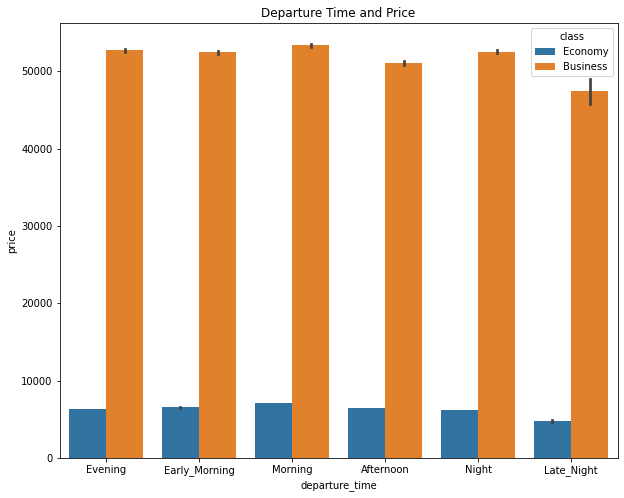

In [19]:
plt.figure(figsize=[10, 8])
sns.barplot(data=dataset, x="departure_time", y="price", hue="class", order=["Evening", "Early_Morning", "Morning", "Afternoon", "Night", "Late_Night"])
plt.title("Departure Time and Price")
plt.show()

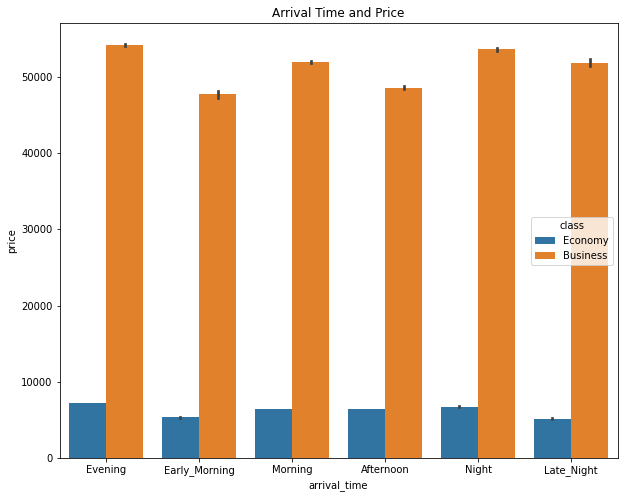

In [20]:
plt.figure(figsize=[10, 8])
sns.barplot(data=dataset, x="arrival_time", y="price", hue="class", order=["Evening", "Early_Morning", "Morning", "Afternoon", "Night", "Late_Night"])
plt.title("Arrival Time and Price")
plt.show()

# There are some slight variations between arrival and departure time prices. It's best to depart late at night and arrive early in the morning if you want a cheap flight. Morning departures and evening arrivals are the most expensive.

# Encode Features

In [21]:
encoded_dataset = pd.get_dummies(dataset)
encoded_dataset.head()

,stops,duration,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,2.17,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,0,2.33,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,0,2.17,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,2.25,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,2.33,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


# Get Column Names, convert to np array, encode data as another dataset

In [22]:
from sklearn.model_selection import train_test_split

nonencoded_features = ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class", "duration"]
encoded_features = encoded_dataset.columns.tolist()
encoded_features = np.delete(encoded_features, 2, axis=0)
all_data = np.array(dataset)
all_x = all_data[:,0:8]
all_y = all_data[:,8]

all_data_encoded = np.array(encoded_dataset)
all_x_encoded = np.delete(all_data_encoded[:,0:len(encoded_dataset.columns)],2, axis=1)
all_y_encoded = all_data_encoded[:,2]

train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=.2, random_state=1)

train_x_encoded, test_x_encoded, train_y_encoded, test_y_encoded = train_test_split(all_x_encoded,
                                                                                    all_y_encoded, test_size=.2, random_state=1)
train_x_encoded.shape, train_y_encoded.shape, test_x_encoded.shape, test_y_encoded.shape
encoded_features



array(['stops', 'duration', 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Afternoon', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai',
       'class_Business', 'class_Economy'], dtype='<U28')

# Train RandomForest Regressor and make predictions

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr_start = time.time()
RFRmodel = RandomForestRegressor(random_state=1)
RFRmodel.fit(train_x_encoded, train_y_encoded)
RFR_train_pred_y = RFRmodel.predict(train_x_encoded)
RFR_test_pred_y = RFRmodel.predict(test_x_encoded)
rfr_stop = time.time()

# Train CatBoost Regressor and make predictions

In [24]:
dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,5955


In [25]:
from catboost import CatBoostRegressor

cbr_start = time.time()
CBRmodel = CatBoostRegressor(random_state=1, cat_features=[0, 1, 2, 4, 5, 6], verbose=False)
CBRmodel.fit(train_x, train_y, verbose=False)
CBR_train_pred_y = CBRmodel.predict(train_x)
CBR_test_pred_y = CBRmodel.predict(test_x)
cbr_stop = time.time()

# Train XGBoost

In [26]:
import xgboost as xgb

xgb_start = time.time()
XGBmodel = xgb.XGBRegressor(random_state=1)
XGBmodel.fit(train_x_encoded, train_y_encoded)
XGB_train_pred_y = XGBmodel.predict(train_x_encoded)
XGB_test_pred_y = XGBmodel.predict(test_x_encoded)
xgb_stop = time.time()

# Train MLP Regressor

In [27]:
from sklearn.neural_network import MLPRegressor

mlp_start = time.time()
MLPmodel = MLPRegressor(random_state=1)
MLPmodel.fit(train_x_encoded, train_y_encoded)
MLP_train_pred_y = MLPmodel.predict(train_x_encoded)
MLP_test_pred_y = MLPmodel.predict(test_x_encoded)
mlp_stop = time.time()

# Evaludate model with R^2/MAE/MSE

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
def evaluate(model, train_pred_y, test_pred_y, isCatboost):
    
    if isCatboost:
        train_r2 = model.score(train_x, train_y)
        test_r2 = model.score(test_x, test_y)
    
        train_mae = mean_absolute_error(train_pred_y, train_y)
        test_mae = mean_absolute_error(test_pred_y, test_y)
        
    else:
        train_r2 = model.score(train_x_encoded, train_y_encoded)
        test_r2 = model.score(test_x_encoded, test_y_encoded)
    
        train_mae = mean_absolute_error(train_pred_y, train_y_encoded)
        test_mae = mean_absolute_error(test_pred_y, test_y_encoded)
    
    return train_r2, test_r2, train_mae, test_mae

In [30]:
rfr_train_r2, rfr_test_r2, rfr_train_mae, rfr_test_mae = evaluate(RFRmodel, RFR_train_pred_y, RFR_test_pred_y, False)
cbr_train_r2, cbr_test_r2, cbr_train_mae, cbr_test_mae = evaluate(CBRmodel, CBR_train_pred_y, CBR_test_pred_y, True) 
xgb_train_r2, xgb_test_r2, xgb_train_mae, xgb_test_mae = evaluate(XGBmodel, XGB_train_pred_y, XGB_test_pred_y, False)
mlp_train_r2, mlp_test_r2, mlp_train_mae, mlp_test_mae = evaluate(MLPmodel, MLP_train_pred_y, MLP_test_pred_y, False)

# Show table of models, accuracies, and runtimes

In [31]:
def create_eval_table(mae_list, r2_list, run_time_list):
    
    evaluation_table = pd.DataFrame({
    
     "Model" : ["Random Forest Regressor", "Catboost Regressor", "XGBoost Regressor", "MLP Regressor"],
     "MAE" : mae_list,
     "R^2" : r2_list,
     "Train and Predict Run Time (s)" : run_time_list
    })
    
    return evaluation_table

In [32]:
train_mae_list = [round(rfr_train_mae), round(cbr_train_mae), round(xgb_train_mae), round(mlp_train_mae)]
train_r2_list = [round(rfr_train_r2, 4), round(cbr_train_r2, 4),  round(xgb_train_r2, 4), round(mlp_train_r2, 4)]
train_run_time_list = [round(rfr_stop - rfr_start), round(cbr_stop - cbr_start), round(xgb_stop - xgb_start), round(mlp_stop - mlp_start)]


evaluation_table_train = create_eval_table(train_mae_list, train_r2_list, train_run_time_list)

evaluation_table_train

,Model,MAE,R^2,Train and Predict Run Time (s)
0,Random Forest Regressor,2021,0.9790,69
1,Catboost Regressor,2822,0.9653,97
2,XGBoost Regressor,2707,0.9679,21
3,MLP Regressor,3565,0.9447,447


In [33]:
test_mae_list = [round(rfr_test_mae), round(cbr_test_mae), round(xgb_test_mae), round(mlp_test_mae)]
test_r2_list = [round(rfr_test_r2, 4), round(cbr_test_r2, 4),  round(xgb_test_r2, 4), round(mlp_test_r2, 4)]
test_run_time_list = [round(rfr_stop - rfr_start), round(cbr_stop - cbr_start), round(xgb_stop - xgb_start), round(mlp_stop - mlp_start)]

evaluation_table_test = create_eval_table(test_mae_list, test_r2_list, test_run_time_list)

evaluation_table_test

,Model,MAE,R^2,Train and Predict Run Time (s)
0,Random Forest Regressor,2148,0.9763,69
1,Catboost Regressor,2835,0.9650,97
2,XGBoost Regressor,2731,0.9672,21
3,MLP Regressor,3530,0.9460,447


# Calculate baseline

In [34]:
mae_baseline = abs(all_y - all_y.mean()).mean()

# Barplot of MAE and models

In [35]:
def bar_graph(models, name, train_vals, test_vals, graph_type):
    plt.figure(figsize=[14,8])
    x_axis=np.arange(len(models))
    plt.bar(x_axis - 0.2, train_vals, 0.4, label = 'Train ' + name)
    if graph_type == 'double':
        plt.bar(x_axis + 0.2, test_vals, 0.4, label = 'Test' + name)
    plt.xticks(x_axis, models)
    plt.xlabel('Models')
    plt.ylabel(name)
    plt.title(name + " per model")
    plt.legend()
    plt.show()

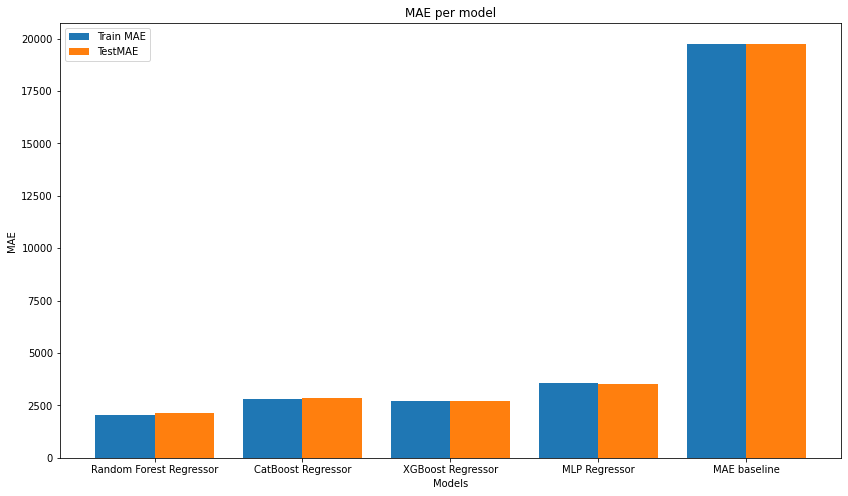

In [36]:
models_mae = ['Random Forest Regressor', 'CatBoost Regressor', 'XGBoost Regressor', 'MLP Regressor', 'MAE baseline']
train_mae = [rfr_train_mae, cbr_train_mae, xgb_train_mae, mlp_train_mae, mae_baseline]
test_mae = [rfr_test_mae, cbr_test_mae, xgb_test_mae, mlp_test_mae, mae_baseline]
bar_graph(models_mae, 'MAE', train_mae, test_mae, 'double')

# R2 plotting

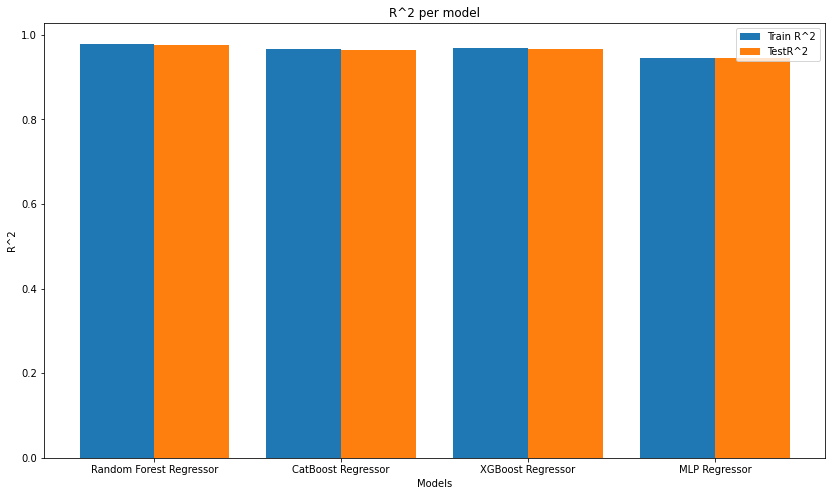

In [37]:
models_r2 = ['Random Forest Regressor', 'CatBoost Regressor', 'XGBoost Regressor', 'MLP Regressor']
train_r2 = [rfr_train_r2, cbr_train_r2, xgb_train_r2, mlp_train_r2]
test_r2 = [rfr_test_r2, cbr_test_r2, xgb_test_r2, mlp_test_r2]
bar_graph(models_r2, 'R^2', train_r2, test_r2, 'double')

# Total Run Time, which include training and predicting.

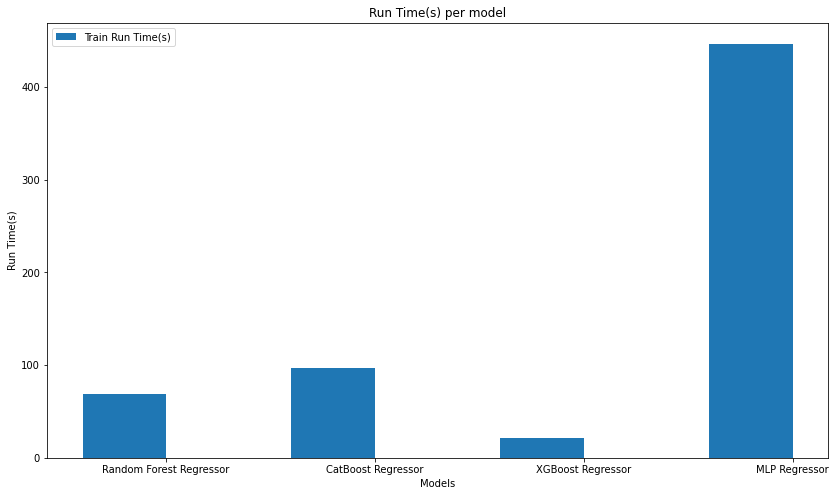

In [38]:
models_run_time = ['Random Forest Regressor', 'CatBoost Regressor', 'XGBoost Regressor', 'MLP Regressor']
run_time = [round(rfr_stop - rfr_start), round(cbr_stop - cbr_start), round(xgb_stop - xgb_start), round(mlp_stop - mlp_start)]
bar_graph(models_run_time, 'Run Time(s)', run_time, None, 'single')

# Check base models will benefit from more data

In [39]:
from sklearn.model_selection import learning_curve
def graph_learning_curve(name, model, tr_x, tr_y):
    arr = [25, 50, 150, 600, 3600, 25200, 50400, 100800, 192097]
    train_sizes, train_scores, test_scores = learning_curve(model, tr_x, tr_y, train_sizes=arr, cv=5, scoring='neg_mean_absolute_error')
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, test_scores_mean, label = 'Testing error')
    plt.ylabel('MAE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    st = 'Learning curve: ' + name
    plt.title(st, fontsize = 18, y = 1.03)
    plt.legend()

# Learning Curve for Random Forest Regressor

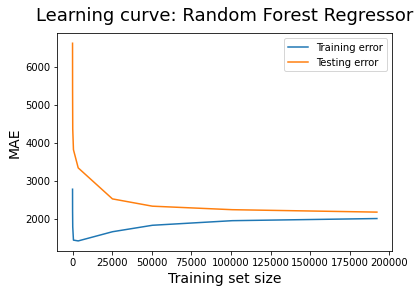

In [40]:
graph_learning_curve('Random Forest Regressor', RFRmodel, train_x_encoded, train_y_encoded)

# Learning Curve for CatBoost Regressor

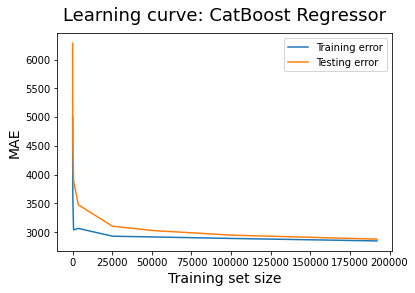

In [41]:
graph_learning_curve('CatBoost Regressor', CBRmodel, train_x, train_y)

# Learning Curve for XGBoost Regressor

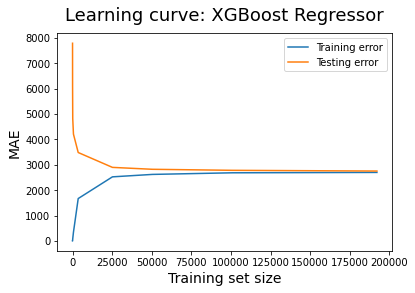

In [42]:
graph_learning_curve('XGBoost Regressor', XGBmodel, train_x_encoded, train_y_encoded)

# Learning Curve for MLP Regressor

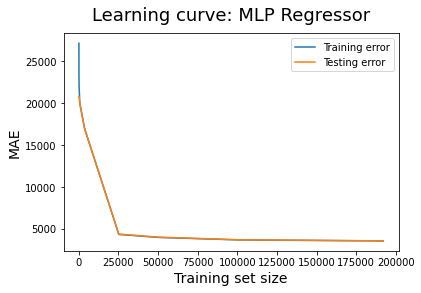

In [43]:
graph_learning_curve('MLP Regressor', MLPmodel, train_x_encoded, train_y_encoded)

# Conclusion: Models will not benefit from more data, Thus now we hypertune each model

In [44]:
#from sklearn.model_selection import GridSearchCV
#def hypertune(model, grid, train_sample, test_sample):
#    m = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=2)
#    return m.fit(train_sample, test_sample)

# Tune Random Forest Regressor

In [45]:
#Expected best (max_depth: 200 | n_estimators: 400)
#rfr_grid = {'max_depth':[200, 300], 
 #           'n_estimators': [400, 450]}
#rfr_model = RandomForestRegressor(random_state=1) 
#rfr_best_params = hypertune(rfr_model, rfr_grid, train_x_encoded, train_y_encoded)
rfr_tuned_start = time.time()
rfr_tuned_model = RandomForestRegressor(max_depth=200, n_estimators=400, random_state=1).fit(train_x_encoded, train_y_encoded)
rfr_tuned_train_pred_y = rfr_tuned_model.predict(train_x_encoded)
rfr_tuned_test_pred_y = rfr_tuned_model.predict(test_x_encoded)
rfr_tuned_stop = time.time()

# Tune CatBoost Regressor

In [46]:
#Expected best (max_depth: 16 | n_estimators: 600?)
#cbr_grid = {'max_depth': [16],
#           'n_estimators':[600, 1000]}
#cbr_model = CatBoostRegressor(random_state=1, cat_features=[0, 1, 2, 4, 5, 6], verbose=False)
#cbr_best_params = hypertune(cbr_model, cbr_grid, train_x, train_y)
cbr_tuned_start = time.time()
cbr_tuned_model = CatBoostRegressor(max_depth=16, n_estimators=600, cat_features=[0, 1, 2, 4, 5, 6], verbose=False, random_state=1).fit(train_x, train_y)
cbr_tuned_train_pred_y = cbr_tuned_model.predict(train_x)
cbr_tuned_test_pred_y = cbr_tuned_model.predict(test_x)
cbr_tuned_stop = time.time()

# Tune MLP

In [47]:
mlp_tuned_start = time.time()
mlp_tuned_model = MLPRegressor(random_state=1, learning_rate_init=.5, hidden_layer_sizes=300)
mlp_tuned_model.fit(train_x_encoded, train_y_encoded)
mlp_tuned_train_pred_y = mlp_tuned_model.predict(train_x_encoded)
mlp_tuned_test_pred_y = mlp_tuned_model.predict(test_x_encoded)
mlp_tuned_stop = time.time()

# Tune Xgboost

In [48]:
xgb_tuned_start = time.time()
xgb_tuned_model = xgb.XGBRegressor(random_state=1, n_estimators=500, max_depth=10)
xgb_tuned_model.fit(train_x_encoded, train_y_encoded)
xgb_tuned_train_pred_y = xgb_tuned_model.predict(train_x_encoded)
xgb_tuned_test_pred_y = xgb_tuned_model.predict(test_x_encoded)
xgb_tuned_stop = time.time()

# Compare Tuned Models

In [49]:
rfr_tuned_train_r2, rfr_tuned_test_r2, rfr_tuned_train_mae, rfr_tuned_test_mae = evaluate(rfr_tuned_model, rfr_tuned_train_pred_y, rfr_tuned_test_pred_y, False)
cbr_tuned_train_r2, cbr_tuned_test_r2, cbr_tuned_train_mae, cbr_tuned_test_mae = evaluate(cbr_tuned_model, cbr_tuned_train_pred_y, cbr_tuned_test_pred_y, True) 
xgb_tuned_train_r2, xgb_tuned_test_r2, xgb_tuned_train_mae, xgb_tuned_test_mae = evaluate(xgb_tuned_model, xgb_tuned_train_pred_y, xgb_tuned_test_pred_y, False)
mlp_tuned_train_r2, mlp_tuned_test_r2, mlp_tuned_train_mae, mlp_tuned_test_mae = evaluate(mlp_tuned_model, mlp_tuned_train_pred_y, mlp_tuned_test_pred_y, False)

# MAE

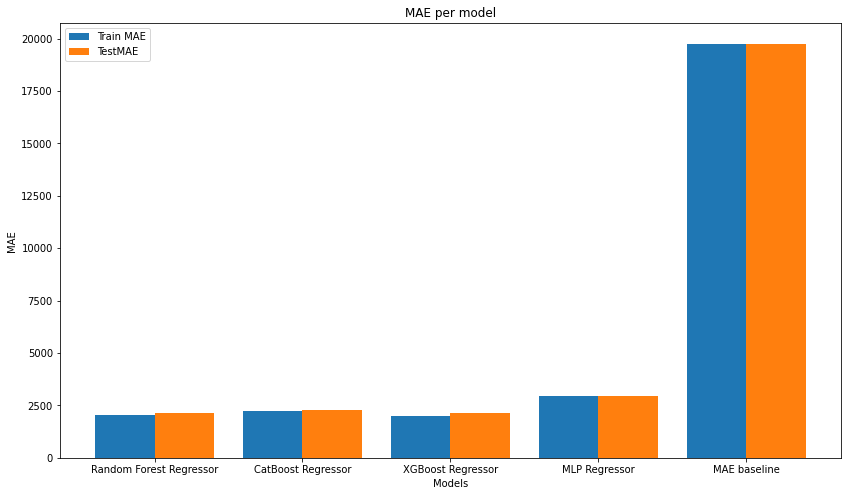

In [50]:
models_mae_tuned = ['Random Forest Regressor', 'CatBoost Regressor', 'XGBoost Regressor', 'MLP Regressor', 'MAE baseline']
train_mae_tuned = [rfr_tuned_train_mae, cbr_tuned_train_mae, xgb_tuned_train_mae, mlp_tuned_train_mae, mae_baseline]
test_mae_tuned = [rfr_tuned_test_mae, cbr_tuned_test_mae, xgb_tuned_test_mae, mlp_tuned_test_mae, mae_baseline]
bar_graph(models_mae_tuned, 'MAE', train_mae_tuned, test_mae_tuned, 'double')

# R^2

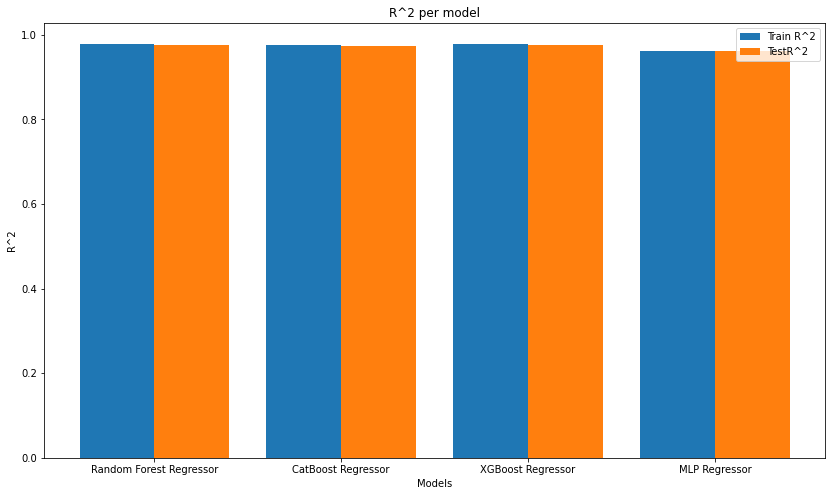

In [51]:
models_r2_tuned = ['Random Forest Regressor', 'CatBoost Regressor', 'XGBoost Regressor', 'MLP Regressor']
train_r2_tuned = [rfr_tuned_train_r2, cbr_tuned_train_r2, xgb_tuned_train_r2, mlp_tuned_train_r2]
test_r2_tuned = [rfr_tuned_test_r2, cbr_tuned_test_r2, xgb_tuned_test_r2, mlp_tuned_test_r2]
bar_graph(models_r2_tuned, 'R^2', train_r2_tuned, test_r2_tuned, 'double')

# Runtime

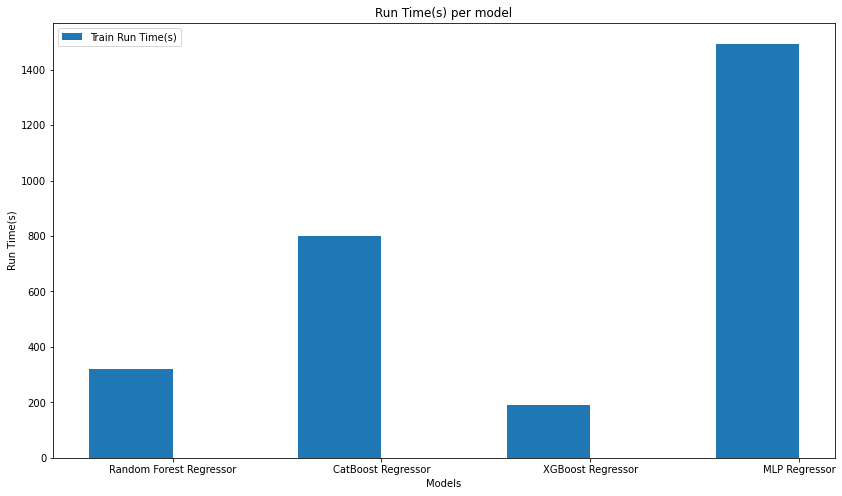

In [52]:
models_run_time_tuned = ['Random Forest Regressor', 'CatBoost Regressor', 'XGBoost Regressor', 'MLP Regressor']
run_time_tuned = [round(rfr_tuned_stop - rfr_tuned_start), round(cbr_tuned_stop - cbr_tuned_start), round(xgb_tuned_stop - xgb_tuned_start), round(mlp_tuned_stop - mlp_tuned_start)]
bar_graph(models_run_time_tuned, 'Run Time(s)', run_time_tuned, None, 'single')

# Evaluation table of new models. Don't need baseline.

In [53]:
train_mae_tuned.pop()
test_mae_tuned.pop()

19759.892536085892

In [54]:
train_mae_tuned = [round(num) for num in train_mae_tuned]
train_r2_tuned = [round(num, 4) for num in train_r2_tuned]

test_mae_tuned = [round(num) for num in test_mae_tuned]
test_r2_tuned = [round(num, 4) for num in test_r2_tuned]

In [55]:
evaluation_table_train_tuned = create_eval_table(train_mae_tuned, train_r2_tuned, run_time_tuned)

evaluation_table_train_tuned

,Model,MAE,R^2,Train and Predict Run Time (s)
0,Random Forest Regressor,2021,0.9791,320
1,Catboost Regressor,2209,0.9762,799
2,XGBoost Regressor,2004,0.9792,190
3,MLP Regressor,2934,0.9618,1494


In [56]:
evaluation_table_test_tuned = create_eval_table(test_mae_tuned, test_r2_tuned, run_time_tuned)

evaluation_table_test_tuned

,Model,MAE,R^2,Train and Predict Run Time (s)
0,Random Forest Regressor,2148,0.9763,320
1,Catboost Regressor,2300,0.9742,799
2,XGBoost Regressor,2140,0.9765,190
3,MLP Regressor,2945,0.9614,1494


# Feature Importances

In [57]:
def toString(list, isCatboost):
    newList = []
    
    for i in range(len(list)):
        a = "{:.4f}".format(list[i])
        if isCatboost:
            newList.append(round(float(a), 2))
        else:
            newList.append(round(float(a) * 100, 2))
        
    return newList

In [58]:
def create_pie(feat_importance, feat_names, title):
    
    labels_list = []
    for feat_name, importance in zip(feat_names, feat_importance):
        
        label_str = ""
        
        label_str += feat_name
        label_str += "  "
        label_str += str(importance)
        label_str += "%"
        
        labels_list.append(label_str)
    
    fig, ax = plt.subplots(figsize=(5,24))
    ax.pie(feat_importance, colors=["#ff0000", "#000000", "#ff8000", "#00ff40", "#00bfff", "#8000ff", "#ff00bf", "#00ffff"])
    plt.title(title)
    ax.legend(labels=labels_list, title='Features',loc='center right', bbox_to_anchor=(1, 0, .5, 1))
    plt.show()
    

In [59]:
def combine_feature_importance(feat_importance):
    
    importance_list = [feat_importance[0], feat_importance[1]]
    
    airline_importance = 0
    source_city_importance = 0
    departure_time_importance = 0
    arrival_time_importance = 0
    destination_city_importance = 0
    class_importance = 0
    
    for i in range(2, len(feat_importance)):
        
        if i >= 2 and i <= 7:
            airline_importance += feat_importance[i]
        elif i >= 8 and i <= 13:
            source_city_importance += feat_importance[i]
        elif i >= 14 and i <= 19:
            departure_time_importance += feat_importance[i]
        elif i >= 20 and i <= 25:
            arrival_time_importance += feat_importance[i]
        elif i >= 26 and i <= 31:
            destination_city_importance += feat_importance[i]
        else:
            class_importance += feat_importance[i]
    
    importance_list.append(airline_importance)
    importance_list.append(source_city_importance)
    importance_list.append(departure_time_importance)
    importance_list.append(arrival_time_importance)
    importance_list.append(destination_city_importance)
    importance_list.append(class_importance)
    
    return importance_list

In [60]:
RFR_importance = toString((RFRmodel.feature_importances_).tolist(), False)
CBR_importance = toString((CBRmodel.feature_importances_).tolist(), True)
XGB_importance = toString((XGBmodel.feature_importances_).tolist(), False)

In [61]:
CBR_importance = [round(num, 2) for num in CBR_importance]

In [62]:
feature_names = ["stops", "duration", "airline", "source_city", "departure_time", "arrival_time", "destination_city", "class"]
RFR_updated_importance = combine_feature_importance(RFR_importance)
XGB_updated_importance = combine_feature_importance(XGB_importance)

In [63]:
RFR_updated_importance = [round(num, 2) for num in RFR_updated_importance]
XGB_updated_importance = [round(num, 2) for num in XGB_updated_importance]

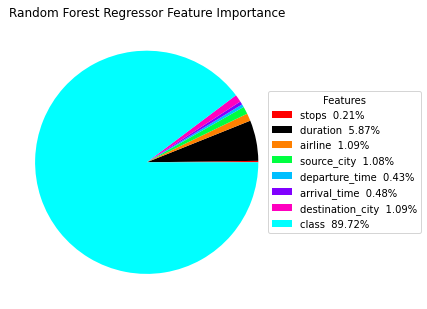

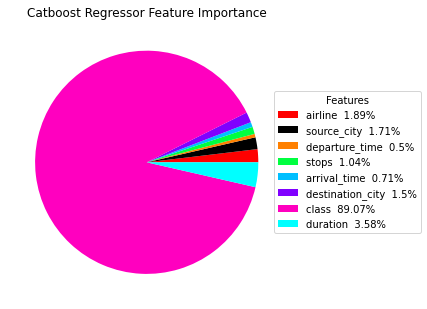

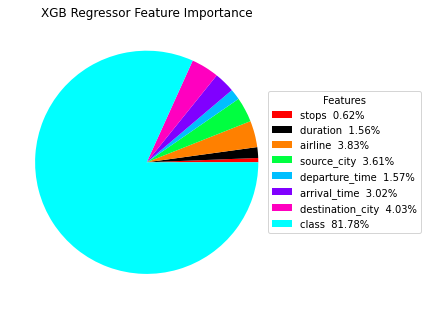

In [64]:
create_pie(RFR_updated_importance, feature_names, "Random Forest Regressor Feature Importance")
create_pie(CBR_importance, nonencoded_features, "Catboost Regressor Feature Importance")
create_pie(XGB_updated_importance, feature_names, "XGB Regressor Feature Importance")

# Figure out best model